### 精准率和召回率的平衡

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10000)

In [5]:
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

In [6]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.9176470588235294

In [7]:
decision_scores = log_reg.decision_function(X_test)

In [8]:
np.min(decision_scores)

-80.09442757894317

In [9]:
np.max(decision_scores)

20.88360141897204

In [10]:
y_predict_2 = np.array(decision_scores >= 5, dtype='int')

In [11]:
f1_score(y_test, y_predict_2)

0.7499999999999999

In [12]:
y_predict_3 = np.array(decision_scores >= -5, dtype='int')

In [13]:
f1_score(y_test, y_predict_3)

0.8247422680412372

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
x_plot = np.linspace(-5, 5, 100)
f1 = []
p1 = []
r1 = []
for a in x_plot:
    y_predict = np.array(decision_scores >= a, dtype='int')
    f1.append(f1_score(y_test, y_predict))
    p1.append(precision_score(y_test, y_predict))
    r1.append(recall_score(y_test, y_predict))

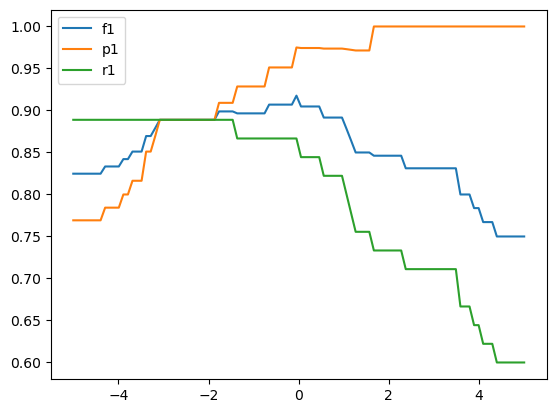

In [24]:
plt.plot(x_plot, f1, label='f1')
plt.plot(x_plot, p1, label='p1')
plt.plot(x_plot, r1, label='r1')
plt.legend()
plt.show()

In [16]:
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [17]:
precisions = []
recalls = []
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test, y_predict))

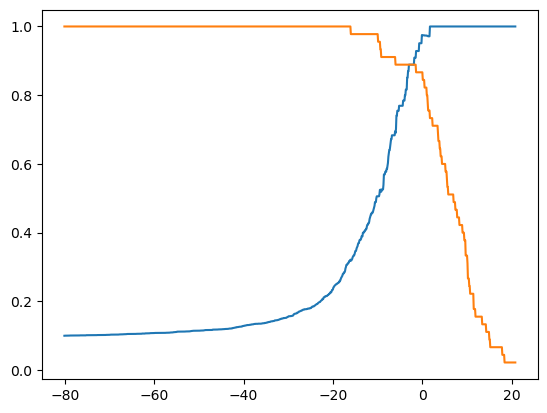

In [18]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

### precision-recall 曲线

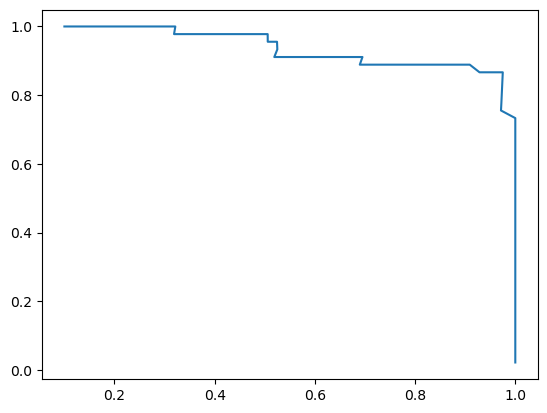

In [19]:
plt.plot(precisions, recalls)
plt.show()

### scikit-learn中的precision-recall 曲线

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

In [21]:
precisions.shape

(140,)

In [22]:
thresholds.shape

(139,)

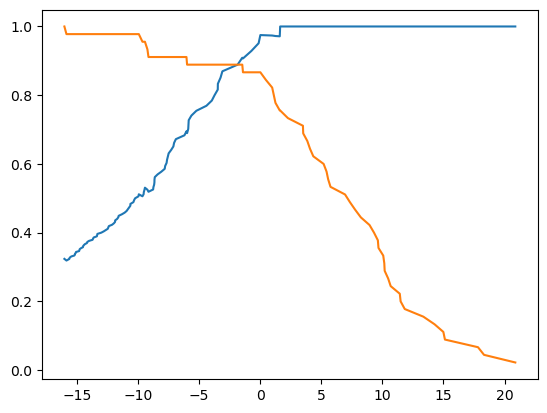

In [23]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()